# <font color='#F44B24'> Image Classification with CNN for CIFAR_10 Data

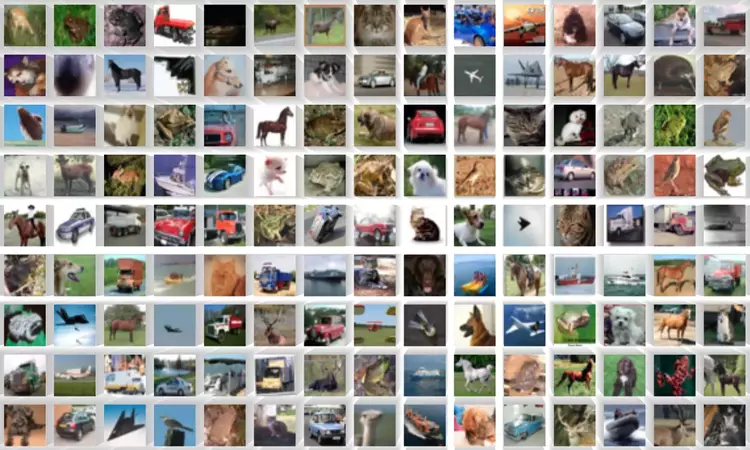

## <font color='#F44B24'> Overview

In this project, we implement a Convolutional Neural Network (CNN) for image classification using the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. These classes are:

- **Airplane**
- **Automobile**
- **Bird**
- **Cat**
- **Deer**
- **Dog**
- **Frog**
- **Horse**
- **Ship**
- **Truck**

The goal of this model is to classify images into one of the 10 categories. We trained a CNN model to learn patterns from these images and predict the corresponding class. The model is evaluated based on its accuracy, and the predictions are displayed along with their associated confidence levels.

By using techniques such as Convolutional Layers, Max-Pooling, and Batch Normalization, the model is able to classify images with high accuracy.

### <font color='#F44B24'> Key Steps:
1. **Data Preprocessing:** Loading and normalizing the CIFAR-10 dataset.
2. **Model Architecture:** A deep CNN model designed for image classification.
3. **Evaluation:** The model is evaluated on a test set to measure accuracy and prediction performance.

This project demonstrates the power of CNNs in handling image classification tasks and provides insights into the CIFAR-10 dataset.

## <font color='#F44B24'> Requirements

In [30]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import cv2
import pandas as pd
import os 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
import warnings
warnings.filterwarnings("ignore")

## <font color='#F44B24'>  Import Data

In [38]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [39]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## <font color='#F44B24'> EDA (Explaratory Data Analysis)

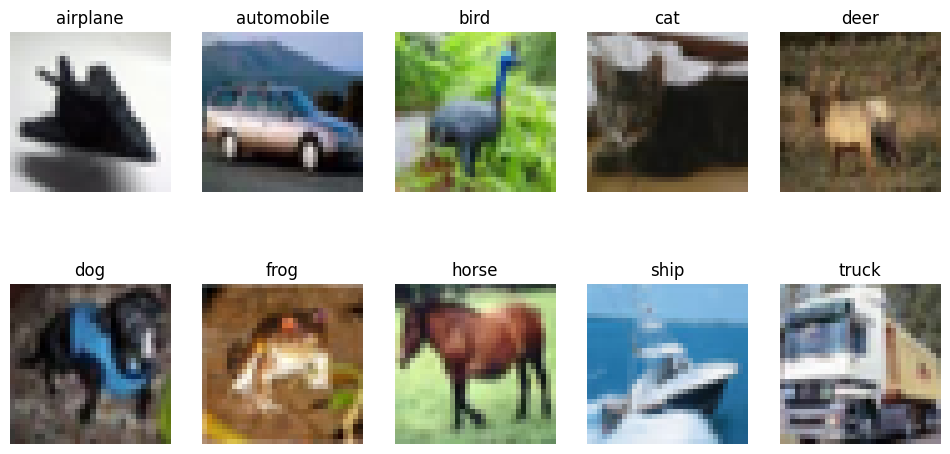

In [40]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

images = [x_train[(y_train.flatten() == i).argmax()] for i in range(10)]


plt.figure(figsize=(12, 6))
for i, image in enumerate(images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')

## <font color='#F44B24'> Preprocess Data

In [41]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train=np.array(x_train)
x_test=np.array(x_test)

In [42]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [43]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

## <font color='#F44B24'> Modelling

In [45]:
model=Sequential()
model.add(Input(shape=(32,32,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40,batch_size=36,verbose=1)

Epoch 1/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.2936 - loss: 1.9680 - val_accuracy: 0.4432 - val_loss: 1.5114
Epoch 2/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5465 - loss: 1.3060 - val_accuracy: 0.5493 - val_loss: 1.4202
Epoch 3/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6460 - loss: 1.0421 - val_accuracy: 0.4829 - val_loss: 1.5342
Epoch 4/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6930 - loss: 0.9118 - val_accuracy: 0.6426 - val_loss: 1.1183
Epoch 5/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7235 - loss: 0.8199 - val_accuracy: 0.6762 - val_loss: 0.9974
Epoch 6/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7563 - loss: 0.7304 - val_accuracy: 0.6502 - val_loss: 0.9997
Epoch 7/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7712 - loss: 0.6840 - val_accuracy: 0.7250 - val_loss: 0.8729
Epoch 8/40
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7897 - loss: 0.6278 

In [48]:
model.save('cnn_model.h5')

## <font color='#F44B24'> Model Interpretation

In [52]:
history.history['accuracy'][-1] # model accuracy

0.9415799975395203

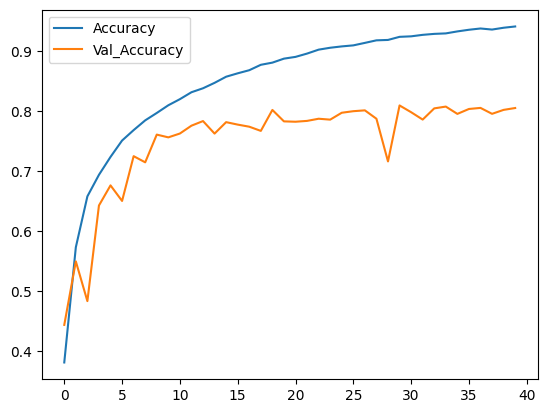

In [89]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

## <font color='#F44B24'> Preparing Submission File

In [55]:
predictions=model.predict(x_test)
predictions=predictions.argmax(axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [74]:
predictions=np.array(predictions)
predictions

array([3, 8, 8, ..., 5, 1, 7])

In [77]:
submission=pd.DataFrame({
    'id':range(1,len(predictions)+1),
    'label':[labels[pred] for pred in predictions]
})

In [78]:
submission.head()

,id,label
0,1,cat
1,2,ship
2,3,ship
3,4,airplane
4,5,frog


In [79]:
submission.to_csv('submission.csv', index=False)

## <font color='#F44B24'> Testing the Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


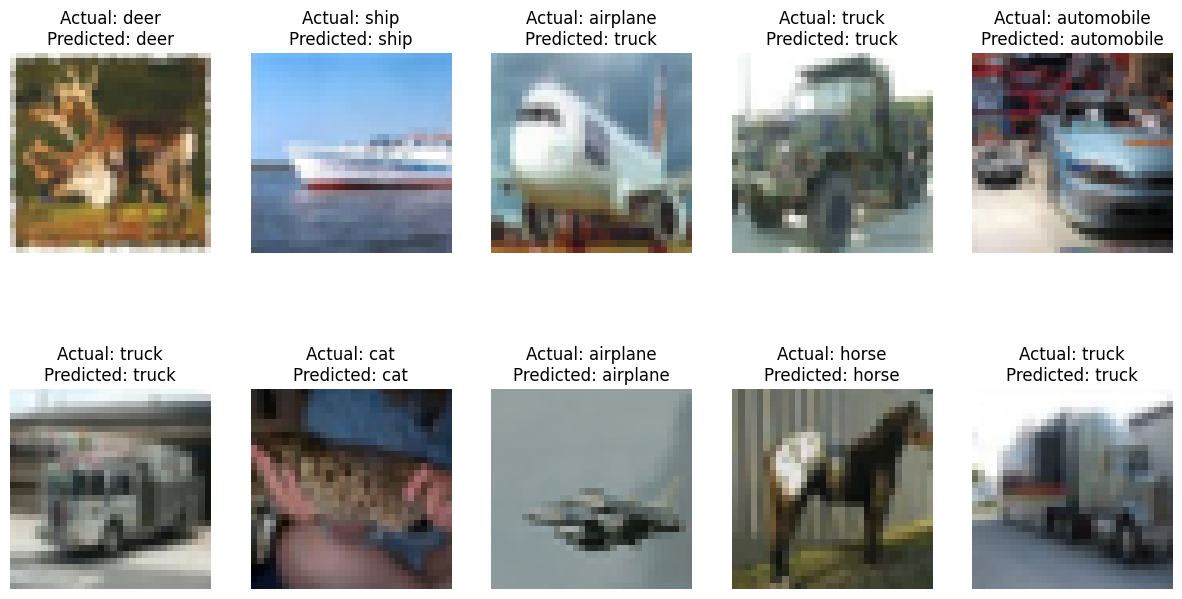

In [88]:
random_indices = np.random.choice(len(x_test), size=10, replace=False)
x_test_resized = x_test[random_indices]  

predictions = model.predict(x_test_resized)

predicted_labels = np.argmax(predictions, axis=1)

actual_labels = y_test[random_indices]

plt.figure(figsize=(15, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"Actual: {labels[actual_labels[i][0]]}\nPredicted: {labels[predicted_labels[i]]}")
    plt.axis('off')
plt.show()

## <font color='#F44B24'> Results

The model was trained for **40 epochs** on the CIFAR-10 dataset, and the final results are as follows:

- **Training Accuracy**: 94.42%
- **Training Loss**: 0.1734
- **Validation Accuracy**: 80.54%
- **Validation Loss**: 0.9290

### Observations:
- The **training accuracy** steadily increased throughout the training process, reaching 94.42% by the final epoch.
- The **validation accuracy** also showed improvement, but with a noticeable gap compared to the training accuracy. This suggests that the model may be overfitting to the training data.
- The **training loss** decreased consistently, while the **validation loss** showed some fluctuations, indicating that the model could potentially benefit from further adjustments to prevent overfitting.